# PyTorch computer vision

## 0. Computer vision libraries in PyTorch

* 'torchvision' - base domain library for PyTorch computer vision
* 'torchvision.datasets' - get datasets and data loading function for computer vision here
* 'torchvision.models' - get pretrained computer vision models that you can leverage for your own problem
* 'torchvision.transforms' - functions for manipulating your vision data (images) to be suitable for use with an ML model
* 'torch.utils.data.Dataset' - base dataset class for PyToch
* 'torch.utils.data.DataLoader' - Create a Python iterable over a dataset

In [5]:
# Import PyTorch 
import torch
from torch import nn

# Import torchvision
import torchvision
from torchvision import datasets
from torchvision import transforms
from torchvision.transforms import ToTensor

# import matplotlib for visualization
import matplotlib.pyplot as plt

# Check versions
print(torch.__version__)
print(torchvision.__version__)


2.4.1+cu121
0.19.1+cu121


## 1. Getting a dataset

The dataset will be using is 'FashionMNIST' from torchvision.datasets.

In [6]:
# Setup training data
train_data = datasets.FashionMNIST(
    root="data", # where to download data to
    train=True, # do we want the training datatets
    download=True, # do we want to download Yes/No?
    transform=torchvision.transforms.ToTensor(), # how do we want to transform the data
    target_transform=None, # how do we want to transform the labels/targets?
    )

test_data = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=torchvision.transforms.ToTensor(),
    target_transform=None
)

In [7]:
len(train_data), len(test_data)

(60000, 10000)

In [8]:
# See the first training example
image, label = train_data[0]
image, label

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0039, 0.0000, 0.0000, 0.0510,
           0.2863, 0.0000, 0.0000, 0.0039, 

In [9]:
class_name = train_data.classes
class_name

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [10]:
class_to_idx = train_data.class_to_idx
class_to_idx

{'T-shirt/top': 0,
 'Trouser': 1,
 'Pullover': 2,
 'Dress': 3,
 'Coat': 4,
 'Sandal': 5,
 'Shirt': 6,
 'Sneaker': 7,
 'Bag': 8,
 'Ankle boot': 9}

In [11]:
train_data.targets

tensor([9, 0, 0,  ..., 3, 0, 5])

## 1.1 Check the input and output shapes of the datasets

In [12]:
# Check the shape of our image
print(f"Image shape: {image.shape} -> [Colour_channels, Height, Width]")
print(f"Image label: {class_name[label]}")


Image shape: torch.Size([1, 28, 28]) -> [Colour_channels, Height, Width]
Image label: Ankle boot


## 1.2 Visualize our data

Image shape: torch.Size([1, 28, 28])


Text(0.5, 1.0, '9')

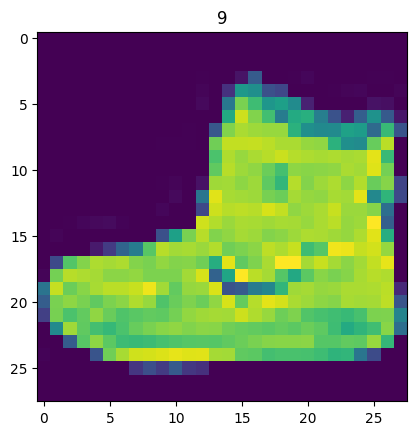

In [13]:
print(f"Image shape: {image.shape}")

plt.imshow(image.squeeze())
plt.title(label)

(-0.5, 27.5, 27.5, -0.5)

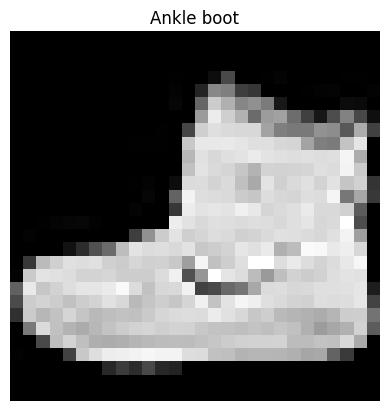

In [14]:
plt.imshow(image.squeeze(), cmap="gray")
plt.title(class_name[label])
plt.axis(False)